In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
from geopandas.tools import sjoin
import matplotlib.pyplot as plt

In [2]:
fecha = '2022-08-04'
data = pd.read_csv(f'data/ventas_mvdeo_{fecha}_depurado.csv')
print(data.shape)
data.head()

(4304, 11)


,desc,valor,metraje,url,lat,lng,dormitorios,barrio,barrio_ine,cod_barrio_ine,valor_metro
0,3 Dormitorios en Aires Puros,190000,110.0,https://www.gallito.com.uy/excelente-garaje-2-...,NaN,NaN,3 Dormitorios,Aires Puros,Aires Puros,29.0,1727.272727
1,3 Dormitorios en Villa Española,38000,150.0,https://www.gallito.com.uy/casa-3-dormitorios-...,-34.86785,-56.14285,3 Dormitorios,Villa Española,Villa Española,24.0,253.333333
2,2 Dormitorios en La Teja,39900,60.0,https://www.gallito.com.uy/economica-con-terre...,-34.85720,-56.24105,2 Dormitorios,La Teja,La Teja,38.0,665.000000
3,4 Dormitorios en Cerrito,45000,97.0,https://www.gallito.com.uy/oportunidad-casa-de...,-34.85944,-56.15642,4 Dormitorios,Cerrito,Cerrito,27.0,463.917526
4,2 Dormitorios en Colon,45000,50.0,https://www.gallito.com.uy/oficina-sosa-proxim...,-34.80505,-56.23007,2 Dormitorios,Colon,"Colón Sureste, Abayubá",58.0,900.000000


In [3]:
print('Sin coordenadas:', sum(data.lat.isna()))

Sin coordenadas: 1150


In [4]:
geodata = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.lng, data.lat), crs=4326).to_crs(32721)

geodata['valor_metro'] = geodata.valor / geodata.metraje

geodata.head(2)

,desc,valor,metraje,url,lat,lng,dormitorios,barrio,barrio_ine,cod_barrio_ine,valor_metro,geometry
0,3 Dormitorios en Aires Puros,190000,110.0,https://www.gallito.com.uy/excelente-garaje-2-...,NaN,NaN,3 Dormitorios,Aires Puros,Aires Puros,29.0,1727.272727,POINT EMPTY
1,3 Dormitorios en Villa Española,38000,150.0,https://www.gallito.com.uy/casa-3-dormitorios-...,-34.86785,-56.14285,3 Dormitorios,Villa Española,Villa Española,24.0,253.333333,POINT (578342.918 6141276.681)


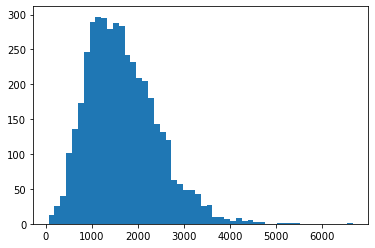

In [5]:
plt.hist(geodata['valor_metro'], bins='auto')

plt.show()

In [6]:
geodata['valor'].describe(percentiles=[.05, .5, .95])

count    4.304000e+03
mean     2.619226e+05
std      1.827638e+05
min      3.000000e+04
5%       7.000000e+04
50%      1.990000e+05
95%      6.398500e+05
max      1.500000e+06
Name: valor, dtype: float64

In [7]:
geodata['metraje'].describe(percentiles=[.05, .5, .95])

count    4304.000000
mean      173.317612
std       132.487442
min        20.000000
5%         55.000000
50%       137.000000
95%       411.700000
max      1599.000000
Name: metraje, dtype: float64

In [8]:
geodata['metraje'].describe(percentiles=[.05, .5, .95])

count    4304.000000
mean      173.317612
std       132.487442
min        20.000000
5%         55.000000
50%       137.000000
95%       411.700000
max      1599.000000
Name: metraje, dtype: float64

In [9]:
geodata[geodata['valor_metro'] == 6.000000e+06]

,desc,valor,metraje,url,lat,lng,dormitorios,barrio,barrio_ine,cod_barrio_ine,valor_metro,geometry


In [10]:
max(geodata.metraje)

1599.0

In [11]:
geodata[geodata['metraje'] > 5000]

,desc,valor,metraje,url,lat,lng,dormitorios,barrio,barrio_ine,cod_barrio_ine,valor_metro,geometry


In [12]:
barrios = gpd.read_file('capas/barrios_ine_uy.zip').set_crs(32721)
barrios.head(2)

,area_km,nombbarr,nrobarrio,geometry
0,2.111,CIUDAD VIEJA,1,"POLYGON ((573146.276 6137144.661, 573148.256 6..."
1,31.795,COLON SURESTE - ABAYUBA,58,"POLYGON ((571329.308 6147787.334, 571320.034 6..."


In [13]:
pegue = sjoin(geodata, barrios.loc[:,['nrobarrio', 'geometry']], how="left")
pegue.head(2)

,desc,valor,metraje,url,lat,lng,dormitorios,barrio,barrio_ine,cod_barrio_ine,valor_metro,geometry,index_right,nrobarrio
0,3 Dormitorios en Aires Puros,190000,110.0,https://www.gallito.com.uy/excelente-garaje-2-...,NaN,NaN,3 Dormitorios,Aires Puros,Aires Puros,29.0,1727.272727,POINT EMPTY,NaN,NaN
1,3 Dormitorios en Villa Española,38000,150.0,https://www.gallito.com.uy/casa-3-dormitorios-...,-34.86785,-56.14285,3 Dormitorios,Villa Española,Villa Española,24.0,253.333333,POINT (578342.918 6141276.681),48.0,24.0


In [14]:
pegue.loc[(pegue.barrio != pegue.barrio_ine) & (~pegue.nrobarrio.isna()), 'cod_barrio_ine'] = pegue.nrobarrio

In [15]:
pegue.head(2)

,desc,valor,metraje,url,lat,lng,dormitorios,barrio,barrio_ine,cod_barrio_ine,valor_metro,geometry,index_right,nrobarrio
0,3 Dormitorios en Aires Puros,190000,110.0,https://www.gallito.com.uy/excelente-garaje-2-...,NaN,NaN,3 Dormitorios,Aires Puros,Aires Puros,29.0,1727.272727,POINT EMPTY,NaN,NaN
1,3 Dormitorios en Villa Española,38000,150.0,https://www.gallito.com.uy/casa-3-dormitorios-...,-34.86785,-56.14285,3 Dormitorios,Villa Española,Villa Española,24.0,253.333333,POINT (578342.918 6141276.681),48.0,24.0


In [16]:
raros = pegue.loc[(pegue.cod_barrio_ine != pegue.nrobarrio) & (~pegue.nrobarrio.isna())]
raros.shape


(614, 14)

In [17]:
pegue.loc[(pegue.barrio != pegue.barrio_ine) & (~pegue.nrobarrio.isna()), 'cod_barrio_ine'] = pegue.nrobarrio

In [18]:
agru = pegue.groupby('cod_barrio_ine').median('valor_metro').reset_index()

agru['cod_barrio_ine'] = agru['cod_barrio_ine'].astype(int)

agru.head()

,cod_barrio_ine,valor,metraje,lat,lng,valor_metro,index_right,nrobarrio
0,1,260000.0,297.5,-34.906680,-56.20565,852.941176,0.0,1.0
1,2,260000.0,230.0,-34.906040,-56.19027,1074.474566,9.0,2.0
2,3,170000.0,130.0,-34.910045,-56.18621,1390.000000,10.0,3.0
3,4,218000.0,150.0,-34.904140,-56.17499,1453.333333,11.0,4.0
4,5,220000.0,136.0,-34.910510,-56.18043,1478.260870,12.0,5.0


In [19]:
cols = ['cod_barrio_ine', 'valor_metro']

geo = pd.merge(barrios, agru[cols], how='left', left_on='nrobarrio', right_on='cod_barrio_ine')
geo.head()

,area_km,nombbarr,nrobarrio,geometry,cod_barrio_ine,valor_metro
0,2.111,CIUDAD VIEJA,1,"POLYGON ((573146.276 6137144.661, 573148.256 6...",1.0,852.941176
1,31.795,COLON SURESTE - ABAYUBA,58,"POLYGON ((571329.308 6147787.334, 571320.034 6...",58.0,1250.000000
2,2.783,TRES OMBUES - VICTORIA,56,"POLYGON ((569357.162 6141087.122, 569333.377 6...",56.0,1025.000000
3,0.784,LA BLANQUEADA,47,"POLYGON ((578073.764 6139184.407, 578112.591 6...",47.0,1764.705882
4,1.873,BRAZO ORIENTAL,51,"POLYGON ((574735.970 6140971.174, 574735.915 6...",51.0,1507.936508


In [20]:
geo.to_file(f'capas/median_{fecha}.gpkg', driver="GPKG")

In [21]:
geo.valor_metro.median()

1212.670495333812

### Hexágonos

In [22]:
grid = gpd.read_file('capas/grilla_hex.gpkg').set_crs(32721)
grid.head(2)

,id,geometry
0,555,"POLYGON ((556312.789 6147560.250, 556457.127 6..."
1,554,"POLYGON ((556312.789 6148060.250, 556457.127 6..."


In [23]:
pegue = sjoin(grid, geodata, how="left")
pegue.head()

,id,geometry,index_right,desc,valor,metraje,url,lat,lng,dormitorios,barrio,barrio_ine,cod_barrio_ine,valor_metro
0,555,"POLYGON ((556312.789 6147560.250, 556457.127 6...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,554,"POLYGON ((556312.789 6148060.250, 556457.127 6...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,553,"POLYGON ((556312.789 6148560.250, 556457.127 6...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,552,"POLYGON ((556312.789 6149060.250, 556457.127 6...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,559,"POLYGON ((556312.789 6145560.250, 556457.127 6...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
pegue.valor_metro.max()

6666.666666666667

In [25]:
agru = pegue.groupby('id').median('valor_metro').reset_index()

agru.head()

,id,index_right,valor,metraje,lat,lng,cod_barrio_ine,valor_metro
0,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
data_grid = grid.merge(agru, on='id', how='left')[['id', 'valor_metro', 'geometry']]

In [27]:
data_grid.to_file(f'capas/grid_median_{fecha}.gpkg', driver="GPKG")